# Don't Be a Sucker
by Casey Durfee <csdurfee@gmail.com>

Copyright 2025. 

## Efficiency of Markets

The efficient market hypothesis says that markets are, given enough time and competition, able to establish the correct price for a commodity. In the case of sports betting, we could think of it as the price of a money line bet. If CLE -300 is a good value, people will rationally want to take it, driving the price up. If it is a bad value, people will rationally want to take the other side. The market maker will respond to an imbalance in bets by adjusting the price. These rational actors will collectively push the price towards the best possible estimate that humans can do.

Under this theory, the final lines should be more accurate than the opening lines. Are they? Indeed they are. Stats are from the NBA season, as of January 24th. I collected the data from sportsbookreview.com [TODO link]

In [1]:
import scrape_sbr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from win_loss_report import win_loss_report, win_loss_from_df

In [2]:
game_data = scrape_sbr.clean_data(end="2025-01-24")

missing scores from 2 games


The code calculates the error (difference between the final score and the line).  Mean Squared Error is the standard way to compare two prediction systems.

In [3]:
opening_errors = game_data.open_with_line.to_numpy()
closing_errors = game_data.with_line.to_numpy()

In [4]:
(opening_errors ** 2).mean()

np.float64(188.30263157894737)

In [5]:
(closing_errors ** 2).mean()

np.float64(181.9046052631579)

So the closing lines have lower error than the opening lines in aggregate.

Let's look at how far the lines were off by. the X's are the closing lines, the Os are the opening lines.

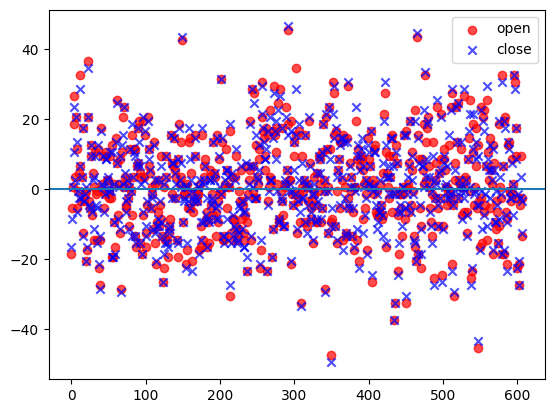

In [6]:
plt.scatter(range(len(opening_errors)), opening_errors, color='r', alpha=0.7, label="open")
plt.scatter(range(len(closing_errors)), closing_errors, color='b',alpha=0.7, marker="x", label="close")
plt.legend()
plt.axhline(y=0)

### Adam Smith, Handicapper

How often were the closing lines were more accurate than the opening lines?

In [61]:
print("Closing lines better:\t", sum(abs(opening_errors) > abs(closing_errors)))
print("Opening lines better:\t", sum(abs(opening_errors) < abs(closing_errors)))
print("Tied:\t\t\t", sum(abs(opening_errors) == abs(closing_errors)))


Closing lines better:	 238
Opening lines better:	 197
Tied:			 173


If the free market were a handicapper, and we interpreted the line movements as a bet on one side, they would have a 54.7% winning percentage.

In [8]:
win_loss_report(238, 197)

record:   238 - 197
full vig (-110) units: 21.3
reduced juice (-106) : 29.18
win pct: 54.71%, expected wins: 217.5 , excess: 20.5, profit %: 4.9
z test: 1.965799536090075, std: 10.428326807307105 , p-value: 0.024660885714149816


While that's OK for a human, I was expecting better from the free market. Why is it wrong 45% of the time?

What about the other 173 games? Maybe those lines were perfect as-is? If so, we'd expect to see equal splits of home vs. away winners, and underdog vs. favorite winners. There shouldn't be any bias to the errors. The free market is essentially labelling these the pinnacle of the handicapper's art.

In [9]:
tie_games = game_data.loc[abs(opening_errors) == abs(closing_errors), :]
tie_games.winner_ats.value_counts()

winner_ats
AWAY    92
HOME    81
Name: count, dtype: int64

In [10]:
tie_games.fave_dog.value_counts()

fave_dog
DOG     100
FAVE     73
Name: count, dtype: int64

There's a slight bias towards away teams and a significant bias towards underdogs winning those bets. Someone taking the underdog in every game where the line didn't move would go 100-73.

In [11]:
win_loss_report(100,73)

record:   100 - 73
full vig (-110) units: 19.7
reduced juice (-106) : 22.62
win pct: 57.8%, expected wins: 86.5 , excess: 13.5, profit %: 11.39
z test: 2.052771987428205, std: 6.576473218982953 , p-value: 0.02004734827573107


58% winning percentage against the spread would be quite impressive for a gambler. Seems like the free market is leaving a lot of meat on the bone.

In [14]:
game_data.fave_dog.value_counts()

fave_dog
DOG     318
FAVE    290
Name: count, dtype: int64

In [15]:
win_loss_report(318,290)

record:   318 - 290
full vig (-110) units: -1.0
reduced juice (-106) : 10.6
win pct: 52.3%, expected wins: 304.0 , excess: 14.0, profit %: -0.16
z test: 1.135549947915338, std: 12.328828005937952 , p-value: 0.12807248330176324


Underdogs win about 52.4% of the time. You've seen that number before, remember? That's the break-even point when betting -110. In other words, a gambler would just break even (at full vig) taking every underdog. They would lose 60 units betting on every favorite.

In [16]:
win_loss_report(290,318)

record:   290 - 318
full vig (-110) units: -59.8
reduced juice (-106) : -47.08
win pct: 47.7%, expected wins: 304.0 , excess: -14.0, profit %: -9.84
z test: -1.135549947915338, std: 12.328828005937952 , p-value: 0.8719275166982368


In [17]:
first_quarter_of_season = game_data.loc[:300,:]
second_quarter_of_season = game_data.loc[300:,:]

Underdogs did much better in the first quarter of the season, winning about 55% of the time against the spread.

In [18]:
first_quarter_of_season.fave_dog.value_counts()

fave_dog
DOG     165
FAVE    136
Name: count, dtype: int64

They have been roughly equal since then:

In [19]:
second_quarter_of_season.fave_dog.value_counts()

fave_dog
FAVE    155
DOG     153
Name: count, dtype: int64

The bias towards away teams winning against the spread has been more consistent, but smaller.

In [20]:
first_quarter_of_season.winner_ats.value_counts()

winner_ats
AWAY    156
HOME    145
Name: count, dtype: int64

In [21]:
second_quarter_of_season.winner_ats.value_counts()

winner_ats
AWAY    160
HOME    148
Name: count, dtype: int64

In [22]:
win_loss_report(156+160, 145+148)

record:   316 - 293
full vig (-110) units: -6.3
reduced juice (-106) : 5.42
win pct: 51.89%, expected wins: 304.5 , excess: 11.5, profit %: -1.03
z test: 0.9320070332440739, std: 12.338962679253067 , p-value: 0.17566644533890785


### Are the lines improving over the course of the season?

I was curious if there was evidence that the errors were getting smaller, or more predictable over time.

In [67]:
raw_closing_errors = np.abs(closing_errors)
closing_ma = pd.Series(raw_closing_errors).rolling(window=50).mean()

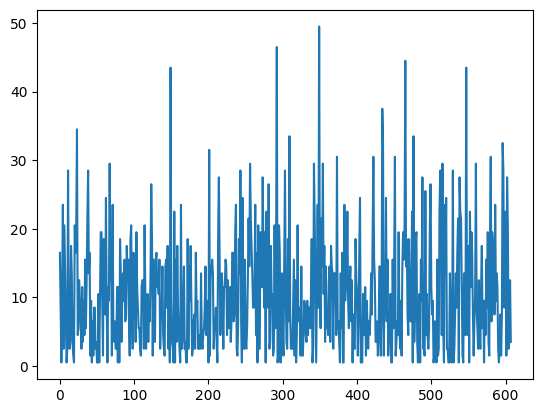

In [68]:
plt.plot(raw_closing_errors)

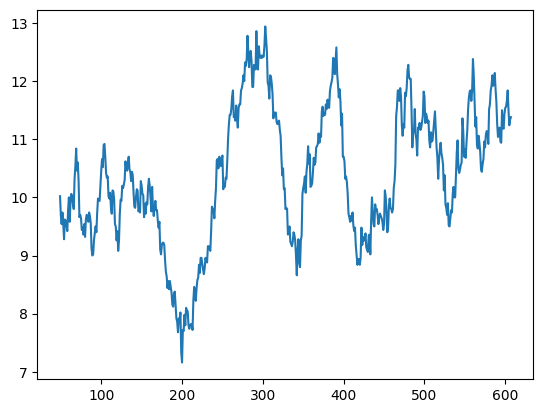

In [33]:
plt.plot(closing_ma)

In [25]:
np.mean(abs(closing_errors[:100]))

np.float64(10.11)

In [26]:
np.mean(abs(closing_errors[100:150]))

np.float64(10.28)

In [27]:
np.mean(abs(closing_errors[150:200]))

np.float64(7.34)

In [28]:
freaky_section = game_data.loc[150:200,:]

In [29]:
game_data['abs_with_line'] = game_data['with_line'].abs()

In [30]:
phoo = game_data.groupby("game_date").mean("abs_with_line")["abs_with_line"]

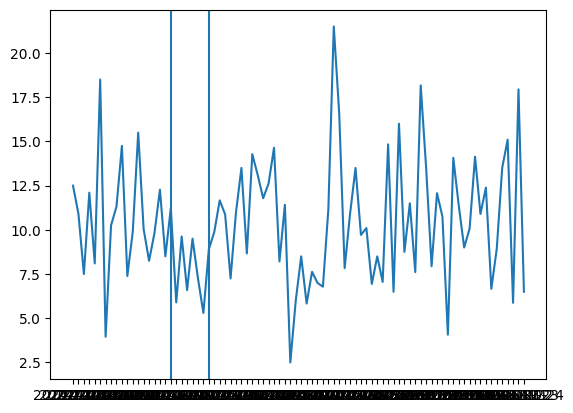

In [31]:
plt.plot(phoo)
plt.axvline(game_data.loc[150, "game_date"])
plt.axvline(game_data.loc[200, "game_date"])


In [32]:
np.mean(abs(closing_errors[200:300]))

np.float64(11.53)

look at average line size over time, and percent error compared to line

In [59]:
spread_abs_ma = pd.Series(game_data.away_spread.abs()).rolling(window=50).mean()

<Axes: >

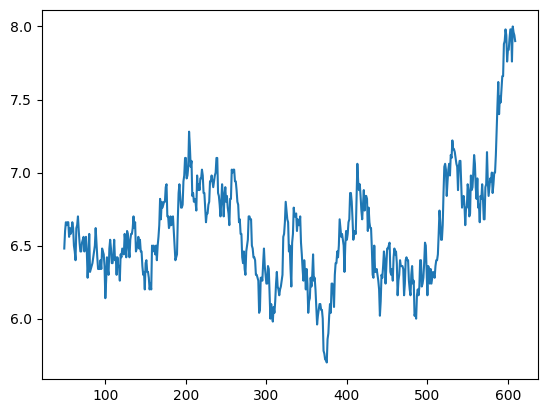

In [60]:
spread_abs_ma.plot()

There are 67 games where the winner flipped from the favorite to the dog, or the dog to the favorite, because of the line movement.

In [43]:
movers = game_data[game_data.fave_dog != game_data.open_fave_dog]

In [70]:
movers.fave_dog.value_counts()

fave_dog
FAVE    34
DOG     33
Name: count, dtype: int64